In [153]:
train = pd.read_csv("../../data/train_new(dropFN).csv").set_index('VisitNumber')
test = pd.read_csv("../../data/test_new(dropFN).csv").set_index('VisitNumber')

In [154]:
train.head()

,TripType,Weekday,NumItems,Return,CategoryCounts,1-HR PHOTO,ACCESSORIES,AUTOMOTIVE,BAKERY,BATH AND SHOWER,...,SEAFOOD,SEASONAL,SERVICE DELI,SHEER HOSIERY,SHOES,SLEEPWEAR/FOUNDATIONS,SPORTING GOODS,SWIMWEAR/OUTERWEAR,TOYS,WIRELESS
VisitNumber,,,,,,,,,,,,,,,,,,,,,
5,37,5,-1,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,22,5,2,0.0,2,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8,18,5,28,1.0,6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,5,5,3,0.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,5,5,3,0.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [155]:
test.head()

,Weekday,NumItems,Return,CategoryCounts,1-HR PHOTO,ACCESSORIES,AUTOMOTIVE,BAKERY,BATH AND SHOWER,BEAUTY,...,SEAFOOD,SEASONAL,SERVICE DELI,SHEER HOSIERY,SHOES,SLEEPWEAR/FOUNDATIONS,SPORTING GOODS,SWIMWEAR/OUTERWEAR,TOYS,WIRELESS
VisitNumber,,,,,,,,,,,,,,,,,,,,,
1,5,4,0.0,3,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,5,4,0.0,3,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,1,0.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,5,0,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [156]:
test_VN = test.reset_index()
test_VN.head()

,VisitNumber,Weekday,NumItems,Return,CategoryCounts,1-HR PHOTO,ACCESSORIES,AUTOMOTIVE,BAKERY,BATH AND SHOWER,...,SEAFOOD,SEASONAL,SERVICE DELI,SHEER HOSIERY,SHOES,SLEEPWEAR/FOUNDATIONS,SPORTING GOODS,SWIMWEAR/OUTERWEAR,TOYS,WIRELESS
0,1,5,4,0.0,3,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,2,5,4,0.0,3,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,5,0,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,5,1,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6,5,0,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [157]:
train_col = train.drop(['TripType'], axis=1)
dfX = train_col
dfy = train.TripType

In [185]:
dfy

VisitNumber
5         37
7         22
8         18
9          5
10         5
11        27
12        33
15        13
17         3
19        34
20         4
23         6
25         5
26        31
28        17
29         5
30         6
31         5
32         5
33         5
40         5
41         5
42         5
43        30
45         5
47        27
49         9
50         6
51         5
53         5
          ..
191276    13
191277    36
191280     5
191283    36
191286    32
191287    18
191289     5
191291     5
191293    28
191298    32
191301    34
191304    28
191305    23
191311     6
191312    34
191313    22
191318     4
191322    30
191324    32
191326    30
191329    16
191331     6
191335    24
191337    30
191342     5
191343    17
191344    14
191345    31
191346    31
191347     5
Name: TripType, Length: 95674, dtype: int64

### XGBoost

#### 1.

In [158]:
import xgboost as xgb
from sklearn.cross_validation import train_test_split
from sklearn.metrics import log_loss

In [159]:
import xgboost as xgb
from sklearn.grid_search import GridSearchCV

In [160]:
mytrain, mytest = train_test_split(train, test_size = .4)

In [161]:
mytrain_ = mytrain.drop(['TripType'], axis=1)

In [162]:
mytest_ = mytest.drop(['TripType'], axis=1)

In [163]:
mytest_.head()

,Weekday,NumItems,Return,CategoryCounts,1-HR PHOTO,ACCESSORIES,AUTOMOTIVE,BAKERY,BATH AND SHOWER,BEAUTY,...,SEAFOOD,SEASONAL,SERVICE DELI,SHEER HOSIERY,SHOES,SLEEPWEAR/FOUNDATIONS,SPORTING GOODS,SWIMWEAR/OUTERWEAR,TOYS,WIRELESS
VisitNumber,,,,,,,,,,,,,,,,,,,,,
164959,3,4,0.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
183934,6,8,0.0,7,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
186487,7,3,0.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22410,1,5,0.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99377,6,2,0.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [164]:
dtrain = xgb.DMatrix(np.asarray(mytrain_), label = np.asarray(mytrain.TripType))
dtest = xgb.DMatrix(np.asarray(mytest_), label = np.asarray(mytest.TripType))

In [67]:
num_round = 200
param1 = {'objective': 'multi:softmax', 'num_class':38, "max_delta_step": 1}
watchlist1 = [(dtrain,'train'), (dtest, 'eval')]

bst = xgb.train(param1, dtrain, num_round, watchlist1, early_stopping_rounds=5)

[0]	train-merror:0.546896	eval-merror:0.558845
Multiple eval metrics have been passed: 'eval-merror' will be used for early stopping.

Will train until eval-merror hasn't improved in 5 rounds.
[1]	train-merror:0.508972	eval-merror:0.526679
[2]	train-merror:0.458836	eval-merror:0.481448
[3]	train-merror:0.412271	eval-merror:0.43768
[4]	train-merror:0.38013	eval-merror:0.406271
[5]	train-merror:0.333566	eval-merror:0.360152
[6]	train-merror:0.321964	eval-merror:0.350405
[7]	train-merror:0.312679	eval-merror:0.341469
[8]	train-merror:0.309456	eval-merror:0.340894
[9]	train-merror:0.303428	eval-merror:0.33768
[10]	train-merror:0.294962	eval-merror:0.329449
[11]	train-merror:0.296147	eval-merror:0.332166
[12]	train-merror:0.287227	eval-merror:0.324562
[13]	train-merror:0.283865	eval-merror:0.322367
[14]	train-merror:0.280973	eval-merror:0.321871
[15]	train-merror:0.276305	eval-merror:0.317507
[16]	train-merror:0.273082	eval-merror:0.316723
[17]	train-merror:0.270086	eval-merror:0.316253
[18

In [92]:
my_test = xgb.DMatrix(np.asarray(mytest_))
test_predictions = bst.predict(my_test).astype(int)

In [98]:
test_predictions

array([31,  6, 37, ...,  6, 19,  9])

In [99]:
np.array(mytest.TripType)

array([25,  6, 37, ...,  6, 19,  9])

In [91]:
len(set(test_predictions))

37

In [73]:
len(mytest.TripType)

38270

In [102]:
from sklearn.metrics import *

In [101]:
confusion_matrix(np.array(mytest.TripType), test_predictions)

array([[1458,    0,    1, ...,    0,    1,    0],
       [   0,    1,  114, ...,    0,    0,    0],
       [   2,    3, 1536, ...,    0,    1,    1],
       ...,
       [   0,    0,   10, ...,    8,    3,    0],
       [   0,    0,    4, ...,    0,   70,    0],
       [ 283,    0,   33, ...,    0,    0, 2562]])

In [104]:
print(classification_report(np.array(mytest.TripType), test_predictions))

             precision    recall  f1-score   support

          0       0.78      0.98      0.87      1482
          1       0.25      0.01      0.02       128
          2       0.75      0.84      0.79      1828
          3       0.69      0.76      0.72       499
          4       0.70      0.66      0.68      2345
          5       0.78      0.86      0.82      4807
          6       0.72      0.77      0.74      3769
          7       0.22      0.07      0.10       105
          8       0.00      0.00      0.00         2
          9       0.61      0.40      0.48       372
         10       0.36      0.38      0.37       197
         11       0.34      0.20      0.25       157
         12       0.66      0.62      0.64       252
         13       0.64      0.67      0.65       262
         14       0.40      0.34      0.37       343
         15       0.43      0.29      0.34        56
         16       0.59      0.60      0.60      1053
         17       0.70      0.76      0.73   

/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [76]:
walmart_test = xgb.DMatrix(np.asarray(test))
prediction_xgb = bst.predict(walmart_test)

In [79]:
prediction_xgb = prediction_xgb.astype(int)

In [81]:
prediction_xgb

array([22, 27, 37, ...,  0, 24, 17])

In [82]:
len(prediction_xgb)

95674

In [86]:
def prediction_to_csv(prediction):
    df_VN = pd.DataFrame(columns=["VisitNumber"])
    df_VN["VisitNumber"] = test.index
    df_TT = pd.DataFrame(columns=["TripType"])
    df_TT["TripType"] = prediction
    df_TT = pd.get_dummies(df_TT.TripType).astype(int, cbopy=False)
    df_TT = df_TT.rename(columns = {0:"TripType_3", 1: "TripType_4", 2: "TripType_5", 3: "TripType_6", 
                4: "TripType_7", 5: "TripType_8", 6: "TripType_9", 7: "TripType_12", 8: "TripType_14", 
                9: "TripType_15", 10: "TripType_18", 11: "TripType_19", 12: "TripType_20", 13: "TripType_21",
                14: "TripType_22", 15: "TripType_23", 16: "TripType_24", 17: "TripType_25", 18: "TripType_26", 
                19: "TripType_27", 20: "TripType_28", 21: "TripType_29", 22: "TripType_30", 23: "TripType_31", 
                24: "TripType_32", 25: "TripType_33", 26: "TripType_34", 27: "TripType_35", 28: "TripType_36", 
                29: "TripType_37", 30: "TripType_38", 31: "TripType_39", 32: "TripType_40", 33: "TripType_41", 
                34: "TripType_42", 35: "TripType_43", 36: "TripType_44", 37: "TripType_999"})
    trial = pd.concat([df_VN, df_TT], axis=1).set_index('VisitNumber')
    #trial["TripType_4"] = 0
    trial["TripType_14"] = 0
    return trial.to_csv("data/trial_6.csv")

In [87]:
prediction_to_csv(prediction_xgb)

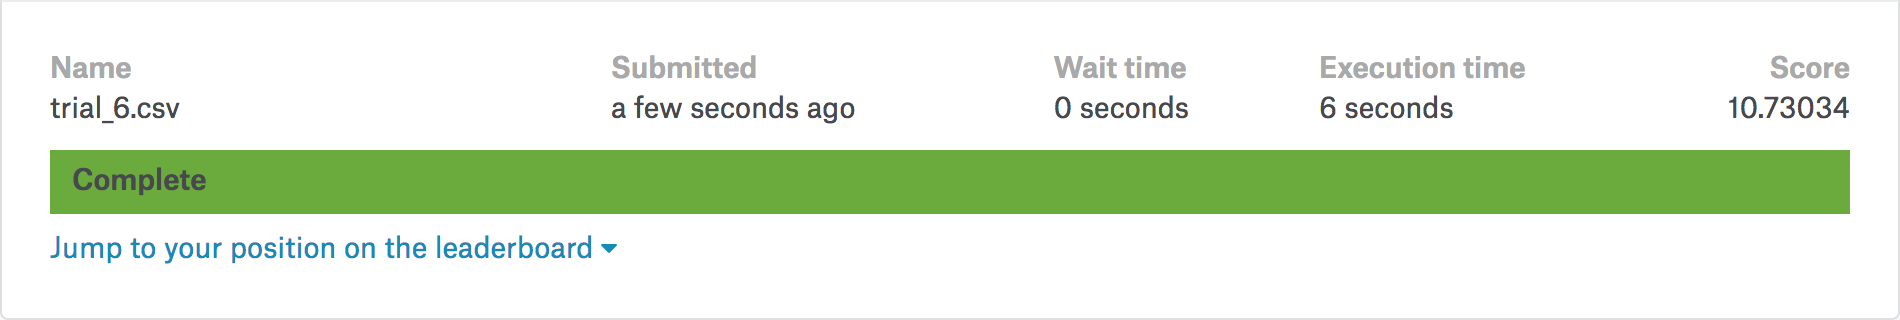

#### 2.

In [174]:
#num_round = 300
num_round = 200
param1 = {'objective': 'multi:softprob', 'num_class':38, 'eval_metric': 'mlogloss', 'bootstrap': False, 'criterion': 'gini', 'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}
watchlist1 = [(dtrain,'train'), (dtest, 'eval')]

bst = xgb.train(param1, dtrain, num_round, watchlist1, early_stopping_rounds=10)

[0]	train-mlogloss:1.73665	eval-mlogloss:1.77349
Multiple eval metrics have been passed: 'eval-mlogloss' will be used for early stopping.

Will train until eval-mlogloss hasn't improved in 10 rounds.
[1]	train-mlogloss:1.47758	eval-mlogloss:1.53153
[2]	train-mlogloss:1.33585	eval-mlogloss:1.40172
[3]	train-mlogloss:1.23694	eval-mlogloss:1.31292
[4]	train-mlogloss:1.15881	eval-mlogloss:1.24358
[5]	train-mlogloss:1.09794	eval-mlogloss:1.19062
[6]	train-mlogloss:1.04803	eval-mlogloss:1.14865
[7]	train-mlogloss:1.00589	eval-mlogloss:1.11326
[8]	train-mlogloss:0.971839	eval-mlogloss:1.0855
[9]	train-mlogloss:0.943457	eval-mlogloss:1.06346
[10]	train-mlogloss:0.91892	eval-mlogloss:1.04467
[11]	train-mlogloss:0.897267	eval-mlogloss:1.0288
[12]	train-mlogloss:0.877871	eval-mlogloss:1.01424
[13]	train-mlogloss:0.861244	eval-mlogloss:1.00299
[14]	train-mlogloss:0.845456	eval-mlogloss:0.991978
[15]	train-mlogloss:0.831371	eval-mlogloss:0.983157
[16]	train-mlogloss:0.819071	eval-mlogloss:0.975545


In [175]:
my_test = xgb.DMatrix(np.asarray(mytest_))
test_predictions = bst.predict(my_test)
log_loss(mytest.TripType, test_predictions).round(5)

0.90871

In [35]:
# 'multi:softmax' 쓸 때
# my_test = xgb.DMatrix(np.asarray(mytest_))
# test_predictions = bst.predict(my_test).astype(int)

# from sklearn.metrics import confusion_matrix, classification_report
# print(classification_report(np.array(mytest.TripType), test_predictions))

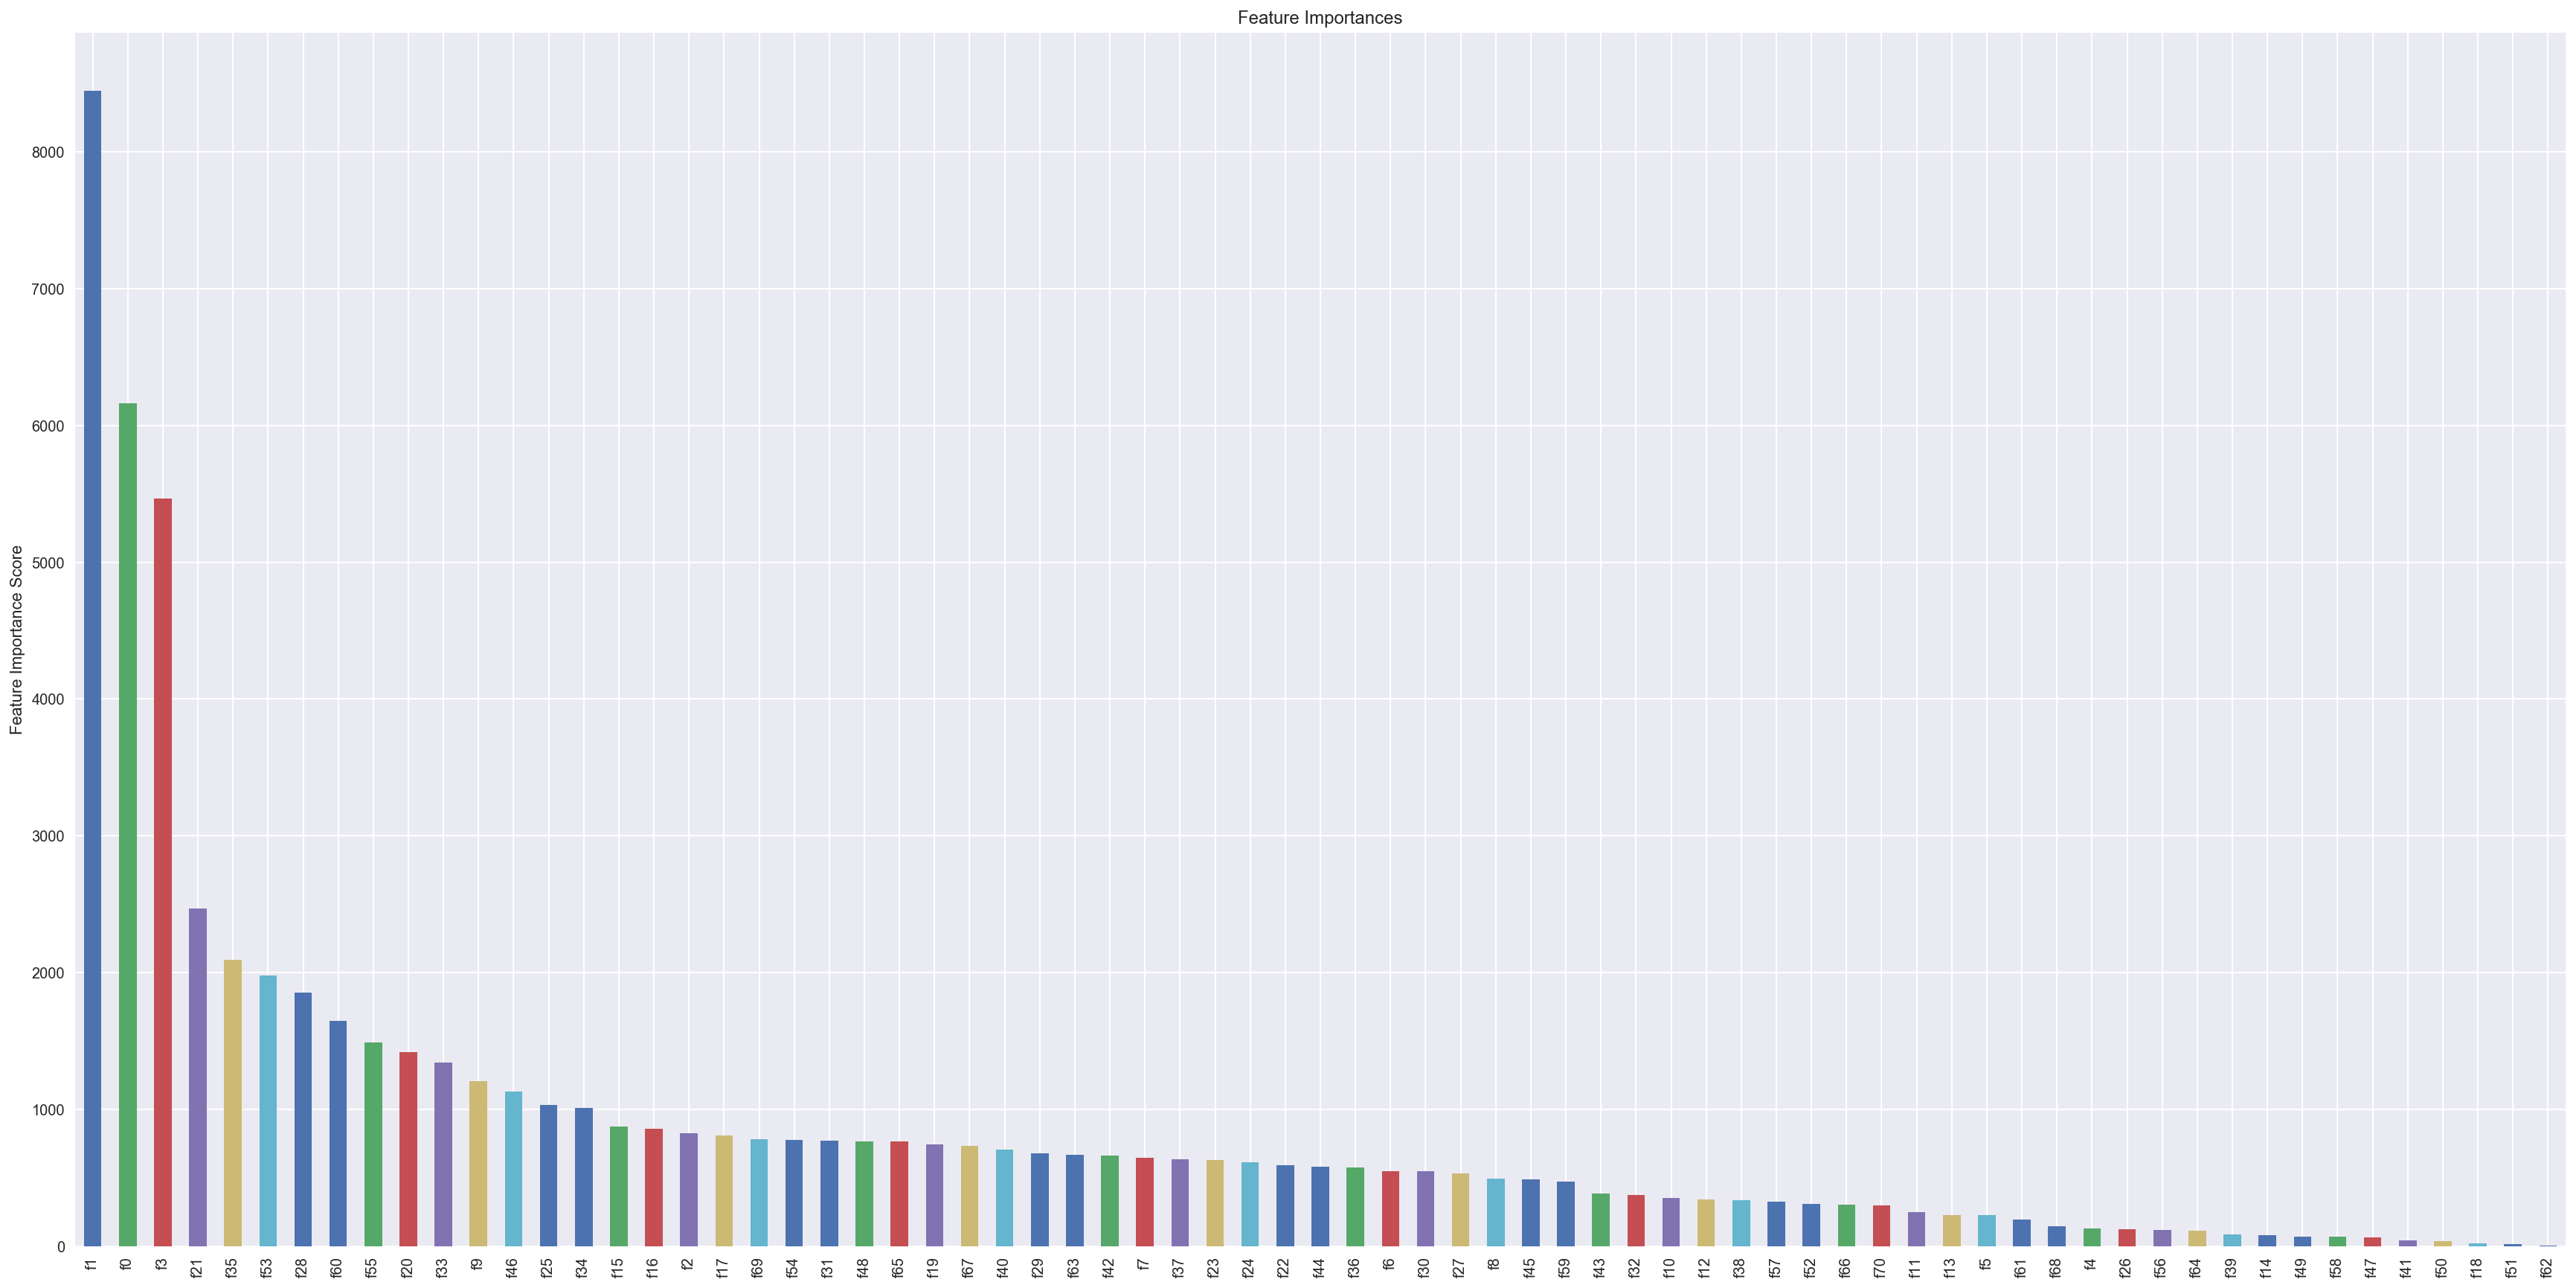

In [25]:
feat_imp = pd.Series(bst.get_fscore()).sort_values(ascending=False)
feat_imp.plot(kind='bar', figsize=(30,15), title='Feature Importances')
plt.ylabel('Feature Importance Score')
plt.show()

In [176]:
dmtest = xgb.DMatrix(np.asarray(test)) 
pred_prob2 = bst.predict(dmtest)

In [177]:
pred_prob2

array([[4.35308866e-05, 1.04699839e-05, 9.10052768e-05, ...,
        5.11701172e-03, 3.97086464e-04, 7.24066002e-03],
       [7.84199729e-05, 1.23608352e-05, 1.89766666e-04, ...,
        4.19600820e-03, 1.51122134e-04, 1.19614741e-02],
       [9.46278504e-08, 7.00154645e-09, 4.20410196e-08, ...,
        1.20296866e-08, 1.71383778e-08, 9.99949574e-01],
       ...,
       [3.63500267e-01, 4.55663439e-06, 6.26777837e-05, ...,
        1.32222185e-05, 1.28050406e-05, 1.34769231e-02],
       [5.82626399e-07, 4.43064238e-07, 1.68165582e-06, ...,
        4.55273967e-03, 4.67621908e-03, 3.79201447e-05],
       [1.00020628e-07, 5.65914213e-08, 1.10715696e-07, ...,
        2.73299898e-04, 1.66870377e-05, 4.03824961e-05]], dtype=float32)

In [178]:
col_array = np.asarray([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37])

In [179]:
columns = {0:"TripType_3", 1: "TripType_4", 2: "TripType_5", 3: "TripType_6", 
                4: "TripType_7", 5: "TripType_8", 6: "TripType_9", 7: "TripType_12", 8: "TripType_14", 
                9: "TripType_15", 10: "TripType_18", 11: "TripType_19", 12: "TripType_20", 13: "TripType_21",
                14: "TripType_22", 15: "TripType_23", 16: "TripType_24", 17: "TripType_25", 18: "TripType_26", 
                19: "TripType_27", 20: "TripType_28", 21: "TripType_29", 22: "TripType_30", 23: "TripType_31", 
                24: "TripType_32", 25: "TripType_33", 26: "TripType_34", 27: "TripType_35", 28: "TripType_36", 
                29: "TripType_37", 30: "TripType_38", 31: "TripType_39", 32: "TripType_40", 33: "TripType_41", 
                34: "TripType_42", 35: "TripType_43", 36: "TripType_44", 37: "TripType_999"}

In [180]:
def predic_proba_to_csv(pred_prob):
    proba_df = pd.DataFrame(pred_prob, columns=col_array)
    proba_df.columns = proba_df.columns.map(lambda x: columns[x])
    sub_df = pd.concat([test_VN[["VisitNumber"]], proba_df], axis=1)
    return sub_df.to_csv("../../data/trial_21.csv", index=False)

In [181]:
predic_proba_to_csv(pred_prob2)

#### 1)
- num_round = 300
- param1 = {'objective': 'multi:softprob', 'num_class':38, "max_delta_step": 3}
- watchlist1 = [(dtrain,'train'), (dtest, 'eval')]
- bst = xgb.train(param1, dtrain, num_round, watchlist1, early_stopping_rounds=10)

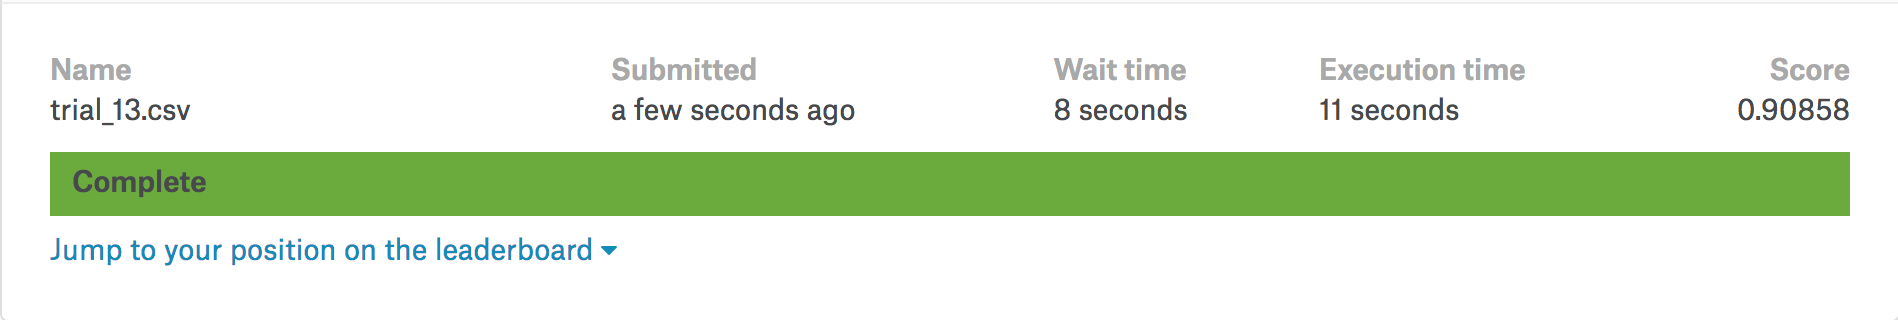

### 2) best score
- num_round = 200
- param1 = {'objective': 'multi:softprob', 'num_class':38, "max_delta_step": 3}
- watchlist1 = [(dtrain,'train'), (dtest, 'eval')]
- bst = xgb.train(param1, dtrain, num_round, watchlist1, early_stopping_rounds=10)
- Stopping. Best iteration:
[62]	train-merror:0.207738	eval-merror:0.305174
- accuracy score : 70%

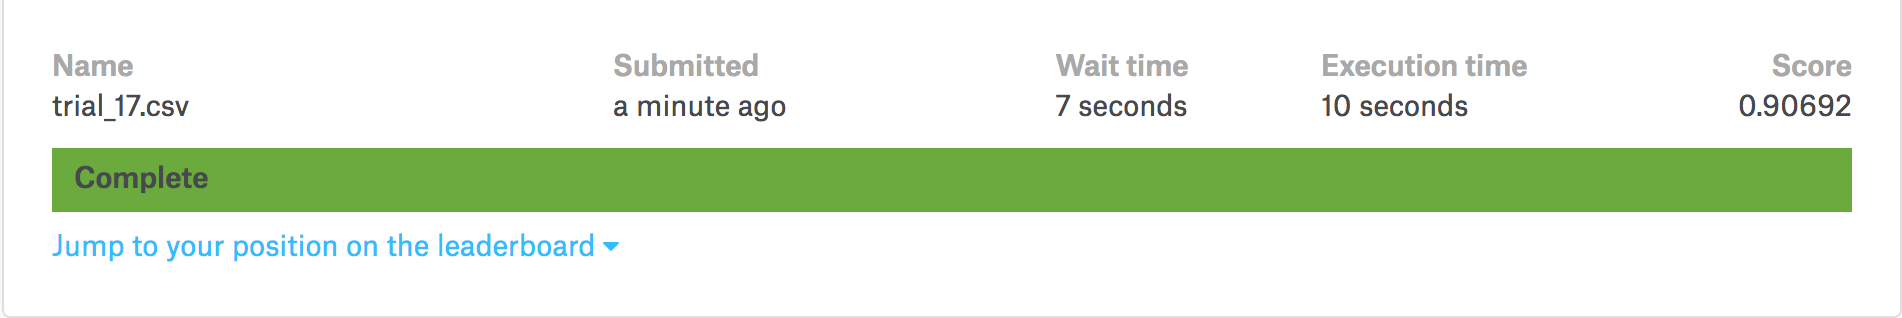

#### 3)
- num_round = 200
- param1 = {'objective': 'multi:softprob', 'num_class':38, 'alpha':0.01, "max_delta_step": 3}
- watchlist1 = [(dtrain,'train'), (dtest, 'eval')]
- bst = xgb.train(param1, dtrain, num_round, watchlist1, early_stopping_rounds=10)
- Stopping. Best iteration:
[54]	train-merror:0.214759	eval-merror:0.304782

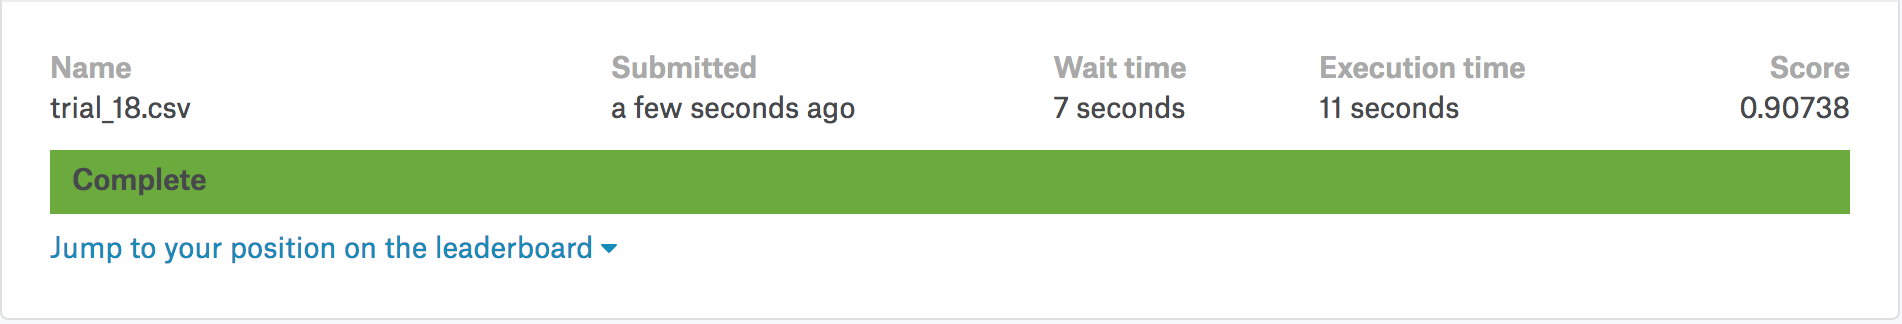

#### 4)
- num_round = 200
- param1 = {'objective': 'multi:softprob', 'num_class':38, 'eval_metric': 'mlogloss', 'alpha':0.1, "max_delta_step": 5}
- watchlist1 = [(dtrain,'train'), (dtest, 'eval')]
- bst = xgb.train(param1, dtrain, num_round, watchlist1, early_stopping_rounds=10)
- Stopping. Best iteration:
[74]	train-mlogloss:0.591994	eval-mlogloss:0.893876

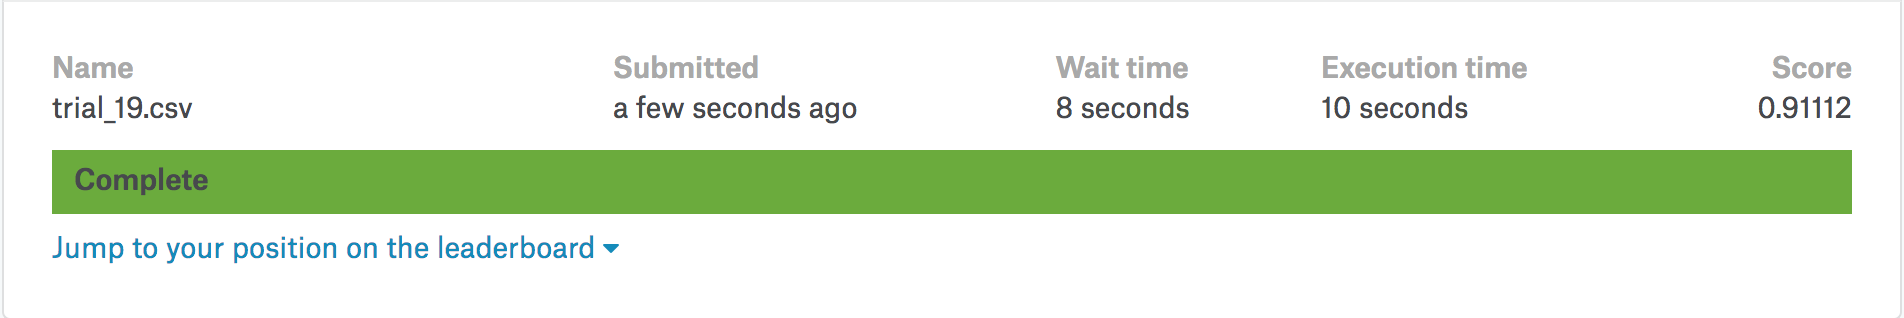

In [142]:
from sklearn.model_selection import RandomizedSearchCV


In [144]:
from time import time
from scipy.stats import randint as sp_randint

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

In [146]:
# build a classifier
clf = RandomForestClassifier(n_estimators=20)


# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


# specify parameters and distributions to sample from
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run randomized search
n_iter_search = 20
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search)

start = time()
random_search.fit(dfX, dfy)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)

# use a full grid over all parameters
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run grid search
grid_search = GridSearchCV(clf, param_grid=param_grid)
start = time()
grid_search.fit(dfX, dfy)

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.cv_results_['params'])))
report(grid_search.cv_results_)

RandomizedSearchCV took 115.70 seconds for 20 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.672 (std: 0.005)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}

Model with rank: 2
Mean validation score: 0.665 (std: 0.006)
Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 9, 'min_samples_leaf': 1, 'min_samples_split': 4}

Model with rank: 3
Mean validation score: 0.665 (std: 0.005)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 10, 'min_samples_leaf': 10, 'min_samples_split': 2}

GridSearchCV took 1724.68 seconds for 216 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.676 (std: 0.005)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 10, 'min_samples_leaf': 3, 'min_samples_split': 2}

Model with rank: 1
Mean validation score: 0.

### Randomforest

In [51]:
from sklearn.metrics import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
import sklearn

In [52]:
forest = RandomForestClassifier(n_estimators = 400, max_features=3)

In [53]:
result = forest.fit(dfX, dfy)

In [55]:
prediction_RF = result.predict_proba(test)

In [60]:
predic_proba_to_csv(prediction_RF)

In [61]:
result.n_classes_

38

In [66]:
result.score(dfX, dfy)

0.931308401446579

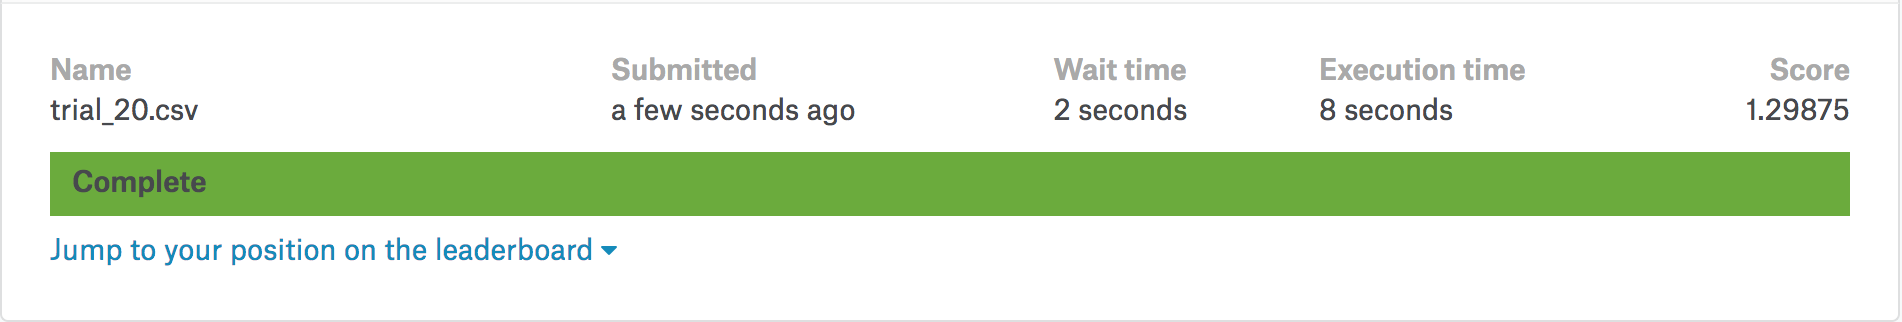

In [119]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

In [120]:
dfX.shape

(95674, 71)

In [121]:
clf = ExtraTreesClassifier()
clf = clf.fit(dfX, dfy)

In [127]:
importances = clf.feature_importances_

In [129]:
pairs = []
for idx, value in enumerate(importances):
    pairs.append((abs(value), dfX.columns[idx]))
pairs.sort(key=lambda x: x[0], reverse=True)
for pair in pairs[:21]:
#    print("importance: {:4f} feature: {}".format(pair[0], pair[1]))
    print("".join(pair[1]))

NumItems
CategoryCounts
Weekday
Return
DSD GROCERY
FINANCIAL SERVICES
PERSONAL CARE
PRODUCE
PHARMACY OTC
GROCERY DRY GOODS
DAIRY
SERVICE DELI
IMPULSE MERCHANDISE
HOUSEHOLD CHEMICALS/SUPP
MENS WEAR
PHARMACY RX
INFANT CONSUMABLE HARDLINES
BEAUTY
FROZEN FOODS
HOUSEHOLD PAPER GOODS
CANDY, TOBACCO, COOKIES


In [123]:
model = SelectFromModel(clf, prefit=True)

In [124]:
dfX_new = model.transform(dfX)

In [125]:
dfX_new.shape

(95674, 21)

In [126]:
pd.DataFrame(dfX_new, 

array([[ 5., -1.,  1., ...,  0.,  0.,  0.],
       [ 5.,  2.,  0., ...,  0.,  0.,  0.],
       [ 5., 28.,  1., ...,  0.,  0.,  0.],
       ...,
       [ 7., 17.,  0., ...,  0.,  0.,  0.],
       [ 7., 17.,  0., ...,  0.,  2.,  0.],
       [ 7.,  2.,  0., ...,  0.,  0.,  0.]])

In [87]:
importance = result.feature_importances_

In [88]:
pairs = []
for idx, value in enumerate(importance):
    pairs.append((abs(value), dfX.columns[idx]))
pairs.sort(key=lambda x: x[0], reverse=True)
for pair in pairs[:20]:
#    print("importance: {:4f} feature: {}".format(pair[0], pair[1]))
    print("".join(pair[1]))

NumItems
CategoryCounts
Weekday
DSD GROCERY
FINANCIAL SERVICES
GROCERY DRY GOODS
Return
PRODUCE
PERSONAL CARE
PHARMACY OTC
DAIRY
SERVICE DELI
IMPULSE MERCHANDISE
MENS WEAR
HOUSEHOLD CHEMICALS/SUPP
PHARMACY RX
FROZEN FOODS
INFANT CONSUMABLE HARDLINES
BEAUTY
HOUSEHOLD PAPER GOODS


In [74]:
pair[1]

'HOUSEHOLD PAPER GOODS'

In [69]:
importance.sort()
importance = importance[::-1]
labels = [label[1] for label in pairs]

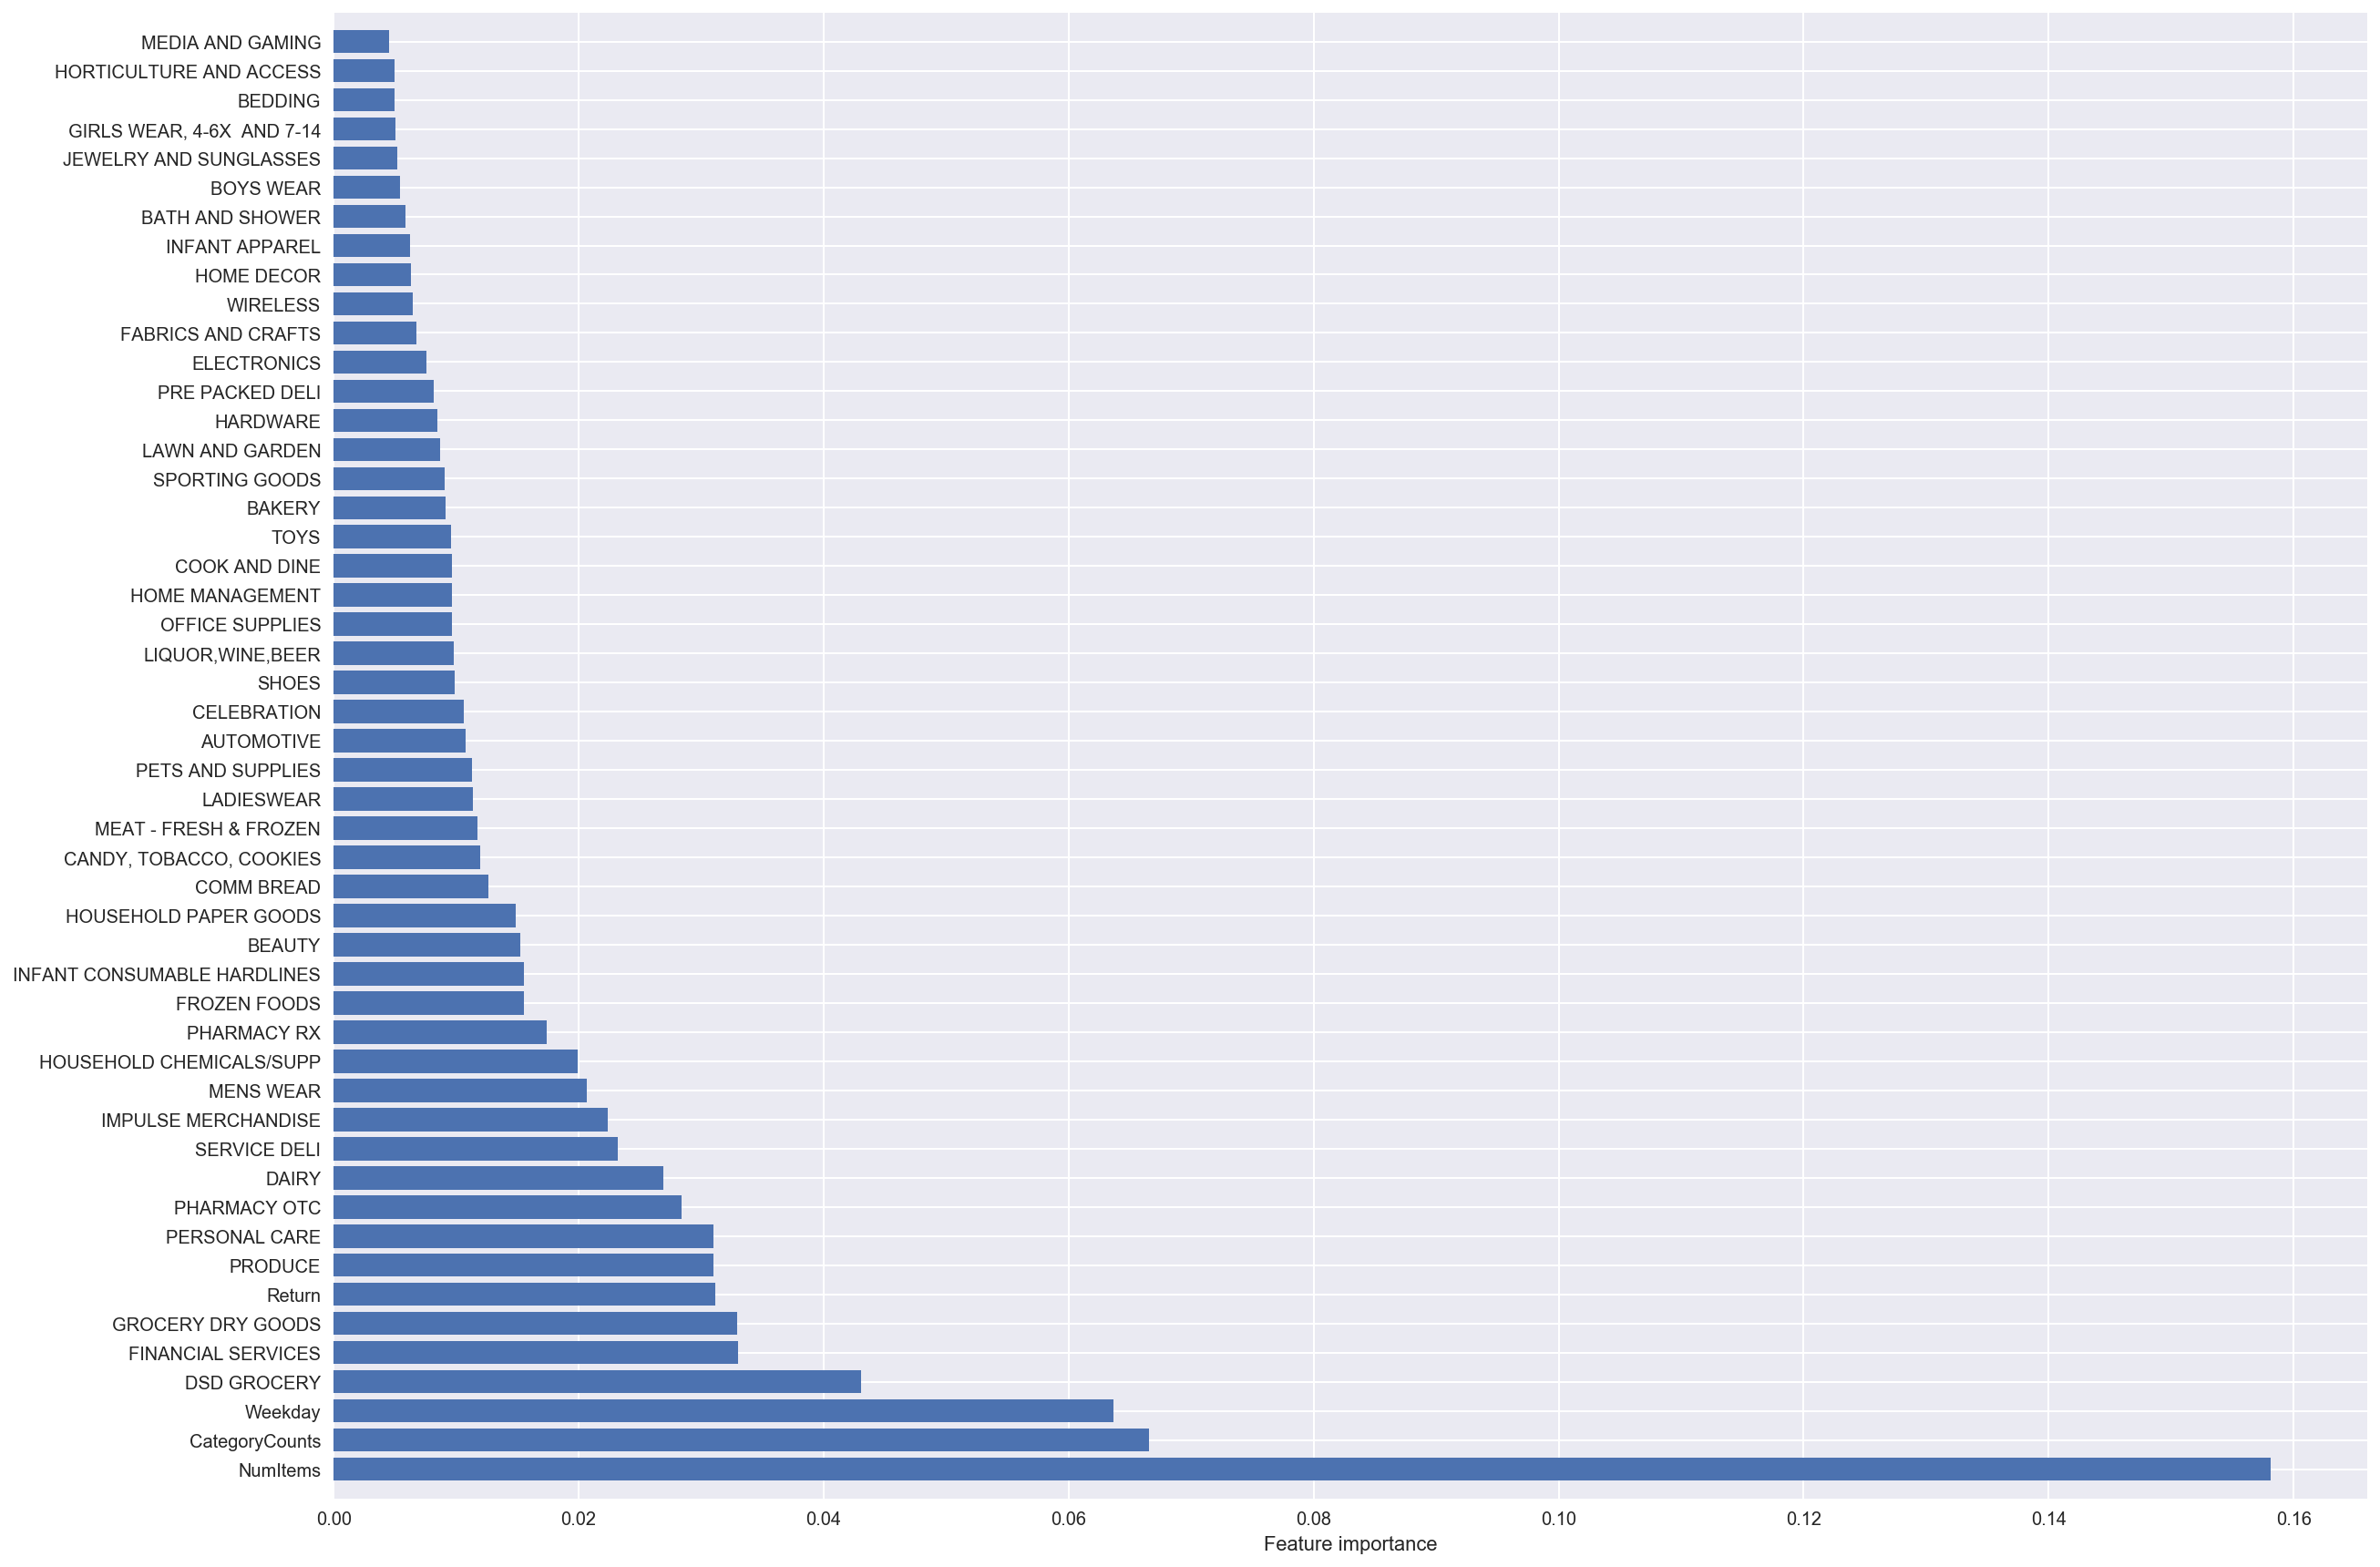

In [73]:
plt.figure(figsize=(20, 15))
plt.barh(range(50), importance[:50], align="center")
plt.yticks(np.arange(50), labels[:50])
plt.xlabel("Feature importance")
plt.ylim(-1, 50)
plt.show()